In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'] , index_col ='date' )

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [55]:
# Clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [56]:
df.isnull().sum()

value    0
dtype: int64

In [57]:
df.shape

(1304, 1)

In [58]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

n = 97.5
df = df.tail(int(len(df)*(n/100)))


In [59]:
df.shape

(1271, 1)

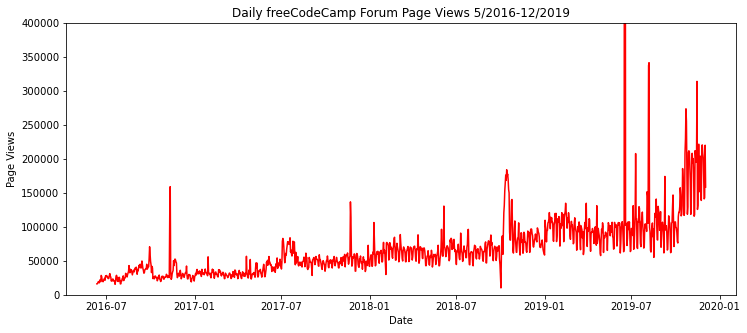

In [60]:
# Draw line plot
 
fig,ax = plt.subplots(figsize=(12,5))

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
plt.ylim(0,400000)


ax.plot(df.index,df['value'],color = 'r')
# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')


In [61]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()

df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar = df_bar.groupby(['year','month']).mean()
df_bar.head()



value
year month              
2016 6      21426.200000
     7      23314.225806
     8      31049.193548
     9      41476.866667
     10     27398.322581

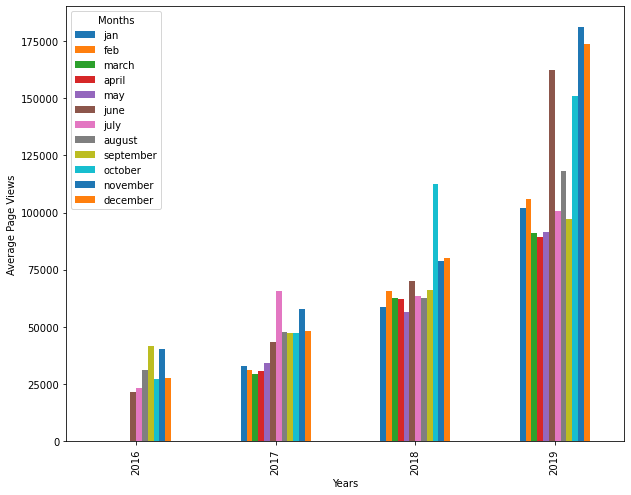

In [62]:
#legend show month label

months = ['jan','feb','march','april','may','june','july','august','september','october','november','december']

fig2,ax2 = plt.subplots(figsize = (10,8))
df_bar.unstack().plot(kind='bar', ax = ax2)
ax2.legend(title = 'Months', labels = months)
ax2.set_xlabel('Years')
ax2.set_ylabel('Average Page Views')

fig2.savefig('bar_plot.png')

In [63]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-06-11,16098,2016,Jun
1,2016-06-12,16147,2016,Jun
2,2016-06-13,17570,2016,Jun
3,2016-06-14,19395,2016,Jun
4,2016-06-15,18584,2016,Jun


In [64]:
df_find = df_box.loc[df_box.year.isin([~2016, 2019])]
df_find

,date,value,year,month
934,2019-01-01,58508,2019,Jan
935,2019-01-02,109708,2019,Jan
936,2019-01-03,100710,2019,Jan
937,2019-01-04,94514,2019,Jan
938,2019-01-05,77897,2019,Jan
...,...,...,...,...
1266,2019-11-29,171584,2019,Nov
1267,2019-11-30,141161,2019,Nov
1268,2019-12-01,142918,2019,Dec
1269,2019-12-02,220144,2019,Dec


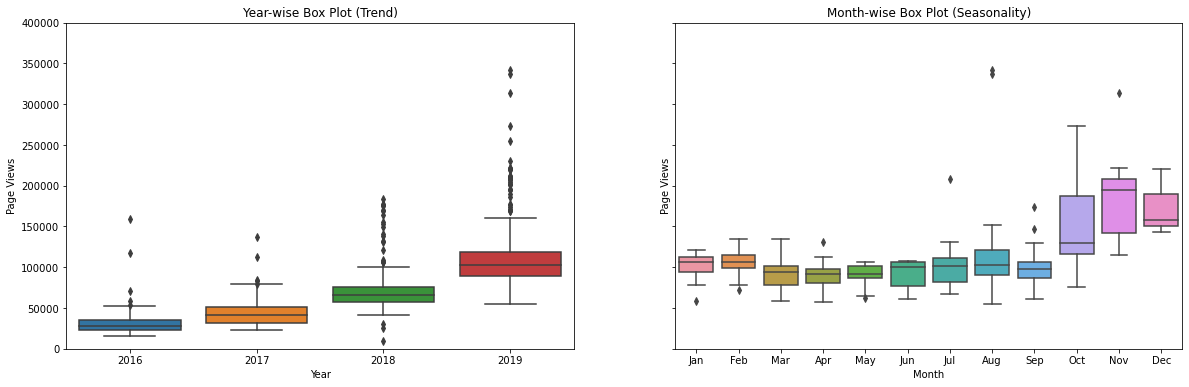

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(20,6), sharey=True)
 
ax[0] = sns.boxplot(x = df_box['year'], y = df_box['value'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot (Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')
plt.ylim(0,400000) # as we did earlier, this will make the data more interpretable
    
ax[1] = sns.boxplot(x=df_find['month'], y=df_box['value'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')

fig.savefig('box_plot.png')